# Happy Customers Project



## Background:

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges. 

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions. 

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels. 

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

## Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers<br>
X1 = my order was delivered on time<br>
X2 = contents of my order was as I expected<br>
X3 = I ordered everything I wanted to order<br>
X4 = I paid a good price for my order <br>
X5 = I am satisfied with my courier<br>
X6 = the app makes ordering easy for me<br> <br>

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer. 


## Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.




## Importing
In the cell below the import statement of the libraries used.

In [348]:
import numpy as np
import pandas as pd
import seaborn as sns  # for data Visualisation
import matplotlib.pyplot as plt # for data Visualisation

from sklearn.model_selection import train_test_split

# classification algorithems
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# testing the results
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [349]:
df = pd.read_csv('dataset.csv')

print(df.shape)
df.head()

(126, 7)


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


no null values were deteced and all the data types of the column are int

In [351]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
X1,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
X2,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
X3,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
X4,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
X5,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
X6,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


from that you can see that the x6(the app makes ordering easy for me) and x1(my order was delivered on time) was very high and x2(contents of my order was as I expected) was the lowest


<AxesSubplot:>

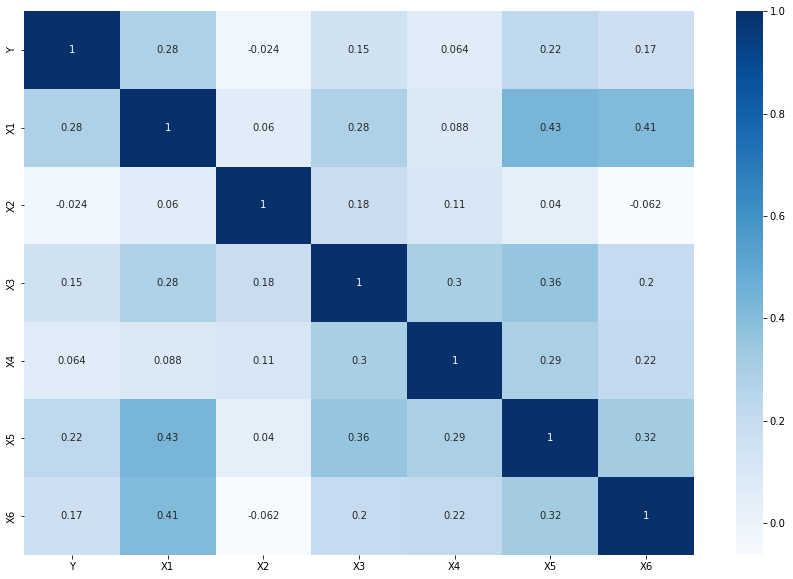

In [352]:
# To check for significantly relevant features, create a correlation matrix for the features in the training data.
fig, ax = plt.subplots(figsize=(15,10))  
corr = df.corr()
sns.heatmap(corr, annot=True,cmap="Blues")

the highest corr with the target is X1 and the other between each other such as X1 and X6

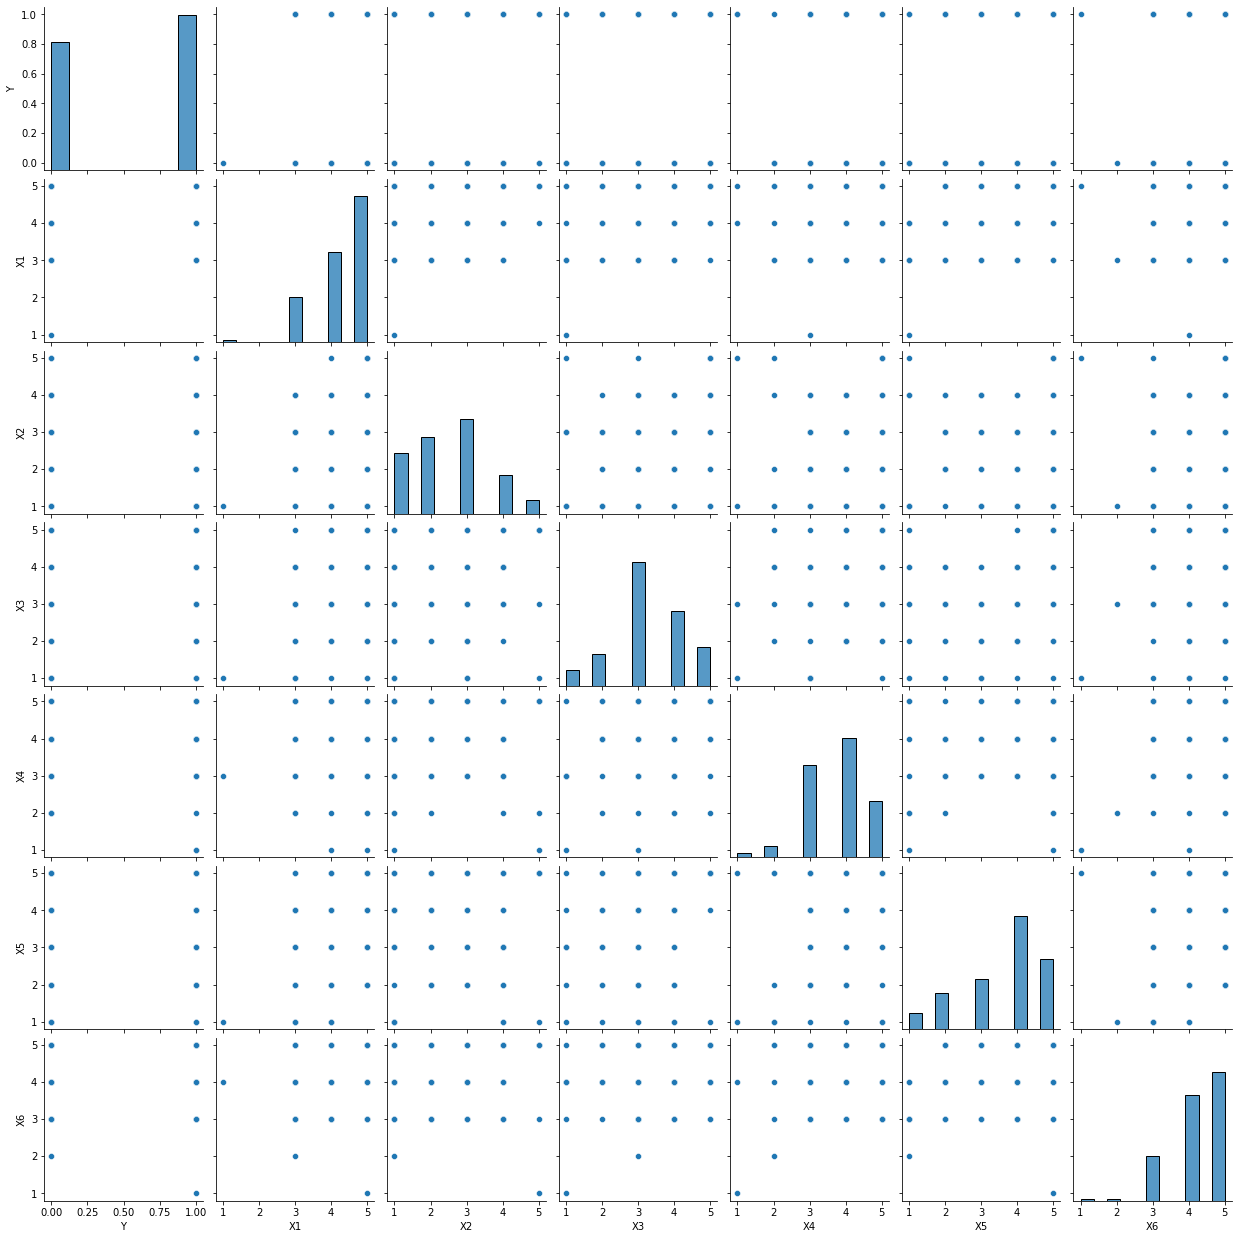

In [353]:
sns.pairplot(df)

In [354]:
def x1Checks(x1):
    if x1 > 3:
        if x1 > 4:
            return 2
        else:
            return 1
    else:
        return 0

df['x1Checks'] = df.X1.apply(lambda x: x1Checks(x))
df['x6Checks'] = df.X6.apply(lambda x: x1Checks(x))

In [355]:
target = df['Y']
data = df.drop(['Y'], axis=1)

In [356]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=42) # the traing size will be 85% while the test size is 15%
print(data.shape)
print(target.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print('\n\n')
# Checks the blanced 
print(y_train.value_counts())
print(y_test.value_counts())

(126, 8)
(126,)
(107, 8)
(19, 8)
(107,)
(19,)



1    60
0    47
Name: Y, dtype: int64
0    10
1     9
Name: Y, dtype: int64


Not bad the data balance in the training and testing 

In [357]:
def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20},cmap="Blues");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

### K Neighbors Classifier

In [358]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)


The Training Score: 68.22429906542055 

The Accuracy is : 0.8421052631578947




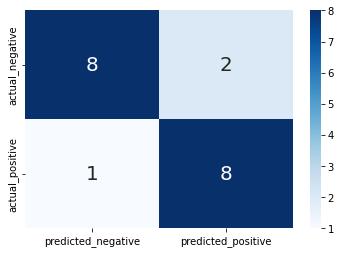

In [359]:
y_predict_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_predict_knn)
print("\nThe Training Score: {} \n".format(knn.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_knn) )
cm_knn = conf_matrix(y_test, y_predict_knn)

### Random Forest Classifier


In [364]:
RFC = RandomForestClassifier(n_estimators=8)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=8)


The Training Score: 90.65420560747664 

The Accuracy is : 0.7894736842105263


              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.73      0.89      0.80         9

    accuracy                           0.79        19
   macro avg       0.80      0.79      0.79        19
weighted avg       0.81      0.79      0.79        19



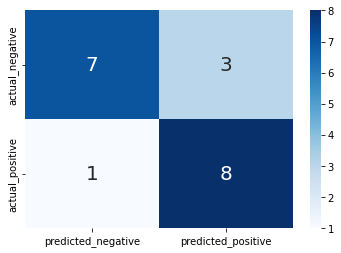

In [365]:
y_predict_RFC = RFC.predict(X_test)
acc_RFC = accuracy_score(y_test, y_predict_RFC)
print("\nThe Training Score: {} \n".format(RFC.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_RFC) )
cm_RFC = conf_matrix(y_test, y_predict_RFC)
print(classification_report(y_test, y_predict_RFC))

### Decision Trees Classifier

In [366]:
DT = DecisionTreeClassifier(max_depth=9)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)


The Training Score: 88.78504672897196 

The Accuracy is : 0.5263157894736842




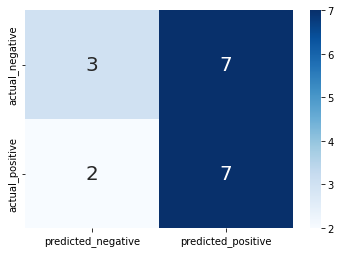

In [367]:
y_predict_DT = DT.predict(X_test)
acc_DT = accuracy_score(y_test, y_predict_DT)
print("\nThe Training Score: {} \n".format(DT.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_DT) )
cm_DT = conf_matrix(y_test, y_predict_DT)

So we get two models that exceed the target accuracy which is 73% which are KNeighborsClassifier but, did not do well in the training test and DecisionTreeClassifier which did well in the training test by over than 90% and accuracy of 78%